## Generating some dependent data

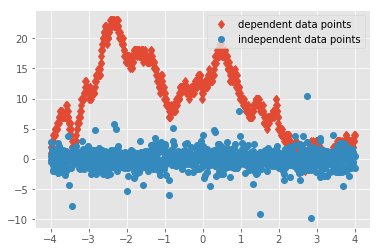

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df=4 #degrees of freedom
sz=1000 #how many
y=np.random.standard_t(4,sz)
xx=[]
jumps=[0.001,0.,1.]
for indx,yi in enumerate(y):
    if indx>1:
        if yi>y[indx-1]:
            xx.append(xx[-1]+np.random.choice(jumps))
        else:
            xx.append(xx[-1]-np.random.choice(jumps))
    else:
        xx.append(1)
xx=np.array(xx)
t = np.linspace(-4, 4, sz)

plt.plot(t, xx, 'd', label='dependent data points')
plt.plot(t, y, 'o', label='independent data points')
plt.grid(True)
plt.legend()
plt.show()



### Plotting the same in Bokeh

In [2]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [6]:
p=figure()
out1=p.diamond(t,xx,size=4,color='coral')
out2=p.diamond(t,y,size=4,color='dodgerblue')
show(p)

# Text field in Jupyter widgets

In [2]:
from ipywidgets import widgets, interactive
from IPython.display import display

def input_listener(text):
    return text

w=interactive(input_listener, text='your google maps api key here!')
display(w)

print('your api key is: {}'.format(w.result))

interactive(children=(Text(value='your google maps api key here!', description='text'), Output()), _dom_classes=('widget-interact',))

your api key is: your google maps api key here!


<h1>Some Input Data</h1>

In [13]:
ylabelsChopped=['l1','l4']
choppedData={'l1':[1.,3.,5.,3.,6.,8.,9.,6.,4.,3.,4.,6.,8.,9.,5.,3.,2.,3.,4.,3.,5.,6.,4.,6.,0.,9.,6.],
             'l2':[5.,6.,6.,4.,3.,5.,7.,4.,3.,5.,4.,4.,5.,4.,3.,4.,5.,6.,4.,4.,3.,4.,5.,5.,4.,3.,5.],
             'l3':[4.,55.,754.,54.,2.,1.,2.,3.,10.,22.,22.,200.,11.,-1.,0.,88.,90.,150.,22.,2.,6.,9.],
             'l4':[5.,5.,5.1,5.2,5.,4.9,4.8,5.]}

<h1>Kolmogorov-Smirnoff with several distributions</h1>

In [7]:
import numpy as np
from math import sqrt
from scipy.stats import kstest, ks_2samp, lognorm
import scipy.stats

def KSSeveralDists(data,dists_and_args,samplesFromDists=100,twosampleKS=True):
    returnable={}
    for dist in dists_and_args:
        try:
            if twosampleKS:
                try:
                    loc=dists_and_args[dist][0]
                    scale=dists_and_args[dist][1]
                    expression='scipy.stats.'+dist+'.rvs(loc=loc,scale=scale,size=samplesFromDists)'
                    sampledDist=eval(expression)
                except:
                    sc=dists_and_args[dist][0]
                    loc=dists_and_args[dist][1]
                    scale=dists_and_args[dist][2]
                    expression='scipy.stats.'+dist+'.rvs(sc,loc=loc,scale=scale,size=samplesFromDists)'
                    sampledDist=eval(expression)
                D,p=ks_2samp(data,sampledDist)
            else:
                D,p=kstest(data,dist,N=samplesFromDists,args=dists_and_args[dist])
        except:
            continue
        returnable[dist]={'KS':D,'p-value':p}
    return returnable

a=lambda m,std: m-std*sqrt(12.)/2.
b=lambda m,std: m+std*sqrt(12.)/2.
sz=2000

sc=0.5 #shape 
datax=lognorm.rvs(sc,loc=0.,scale=1.,size=sz)
normalargs=(datax.mean(),datax.std())

#suppose these are the parameters you wanted to pass for each distribution
dists_and_args={'norm':normalargs,
               'uniform':(a(*normalargs),b(*normalargs)),
               'lognorm':[0.5,0.,1.]
              }
print "two sample KS:"
print KSSeveralDists(datax,dists_and_args,samplesFromDists=sz,twosampleKS=True)
print "one sample KS:"
print KSSeveralDists(datax,dists_and_args,samplesFromDists=sz,twosampleKS=False)


two sample KS:
{'lognorm': {'KS': 0.023500000000000021, 'p-value': 0.63384188886454917}, 'norm': {'KS': 0.1130000000000001, 'p-value': 1.3281084004695013e-11}, 'uniform': {'KS': 0.1695000000000001, 'p-value': 1.4157544445381855e-25}}
one sample KS:
{'lognorm': {'KS': 0.019475227656676863, 'p-value': 0.43405079242714578}, 'norm': {'KS': 0.10914214640176989, 'p-value': 0.0}, 'uniform': {'KS': 0.15749094218789517, 'p-value': 0.0}}


<h1>Akaike and AICc</h1>

In [19]:
from scipy.stats import norm, uniform

def AICc(statsdistribution,data,fitted_params=2.):
    #statsdistribution is a distribution from scipy.stats
    #but for this notebook we will use simply 2-parameter distributions
    #more specifically uniform and gaussian
    #data is numpy data
    k = fitted_params    
    logLik = -np.sum( statsdistribution.logpdf(data, loc=data.mean(), scale=data.std()) )
    aic = 2.*k - 2.*(logLik)
    print aic+(2.*k)*(k+1.)/len(data)-k-1.
    aicc = aic+(2.*k)*(k+1.)/(len(data)-k-1.)
    return {'aic':aic, 'aicc':aicc}


for label in ylabelsChopped:
    datax=np.array(choppedData[label])
    AICs=AICc(norm,datax)
    print "for normal {} {}".format(label,AICs)
    AICs=AICc(uniform,datax)
    print "for uniform {} {}".format(label,AICs)

-121.370915984
for normal l1 {'aicc': -118.3153604287008, 'aic': -118.8153604287008}
-inf
for uniform l1 {'aicc': -inf, 'aic': -inf}
14.8531965461
for normal l4 {'aicc': 18.753196546116293, 'aic': 16.353196546116294}
-inf
for uniform l4 {'aicc': -inf, 'aic': -inf}


<h1>Playing with polyfit</h1>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def polyfit(datadict,labels):
    #polynomial fit to histogram of variable
    fig, ax = plt.subplots(len(labels),1,figsize=(15.,25.))
    for ind,label in enumerate(labels):
        print label
        hist,bins=np.histogram(np.array(datadict[label]),bins=200,density=False)
        ax[ind].plot(bins[:-1],hist, label='histogram {}'.format(label))
        degrees=[10,15,20]
        # calculate polynomial
        for degree in degrees:
            z = np.polyfit(bins[:-1], hist,degree)
            #coefs, accessories = poly.polyfit(bins[:-1], hist,degree, full=True)    
            #print 'polyfit coefs degree {}: {} other:'.format(degree,coefs)
            #print accessories            
            #print '\n'
            f = np.poly1d(z)
            #f=poly.polyval(bins[:-1],coefs[::-1])
            print len(f)
            ax[ind].plot(bins[:-1],f(bins[:-1]),label='degree {}'.format(degree))
        plt.grid(True)
        box = ax[ind].get_position()
        ax[ind].set_position([box.x0, box.y0, box.width, box.height*0.90])
        ax[ind].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,borderaxespad=0.)
    plt.show()


<h1>Notebook Magics</h1>

In [22]:
#list notebook magics
%lsmagic


Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

<h1>Using R in python without using Notebook Magics</h1>

In [20]:
import rpy2.interactive as r
import rpy2.interactive.packages # this can take few seconds
rlib = r.packages.packages
print rlib
r.packages.importr("utils")



rpy2.robjects.packages.Package as a <module 'utils' (built-in)>

<h1>Simple Plotting</h1>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
print plt.style.available
plt.style.use('seaborn-notebook')
x=np.linspace(-2.,2.)
y=x**3
plt.hist(y,bins=50, alpha=0.5, label='histogram x to the power of 3', histtype='stepfilled'
         #)
          ,normed=True)
plt.plot(x, y, 'r--', label='x to the power of 3')
plt.grid()
plt.legend()
plt.show()

<h1>Plotting GEV CDF and PDF</h1>

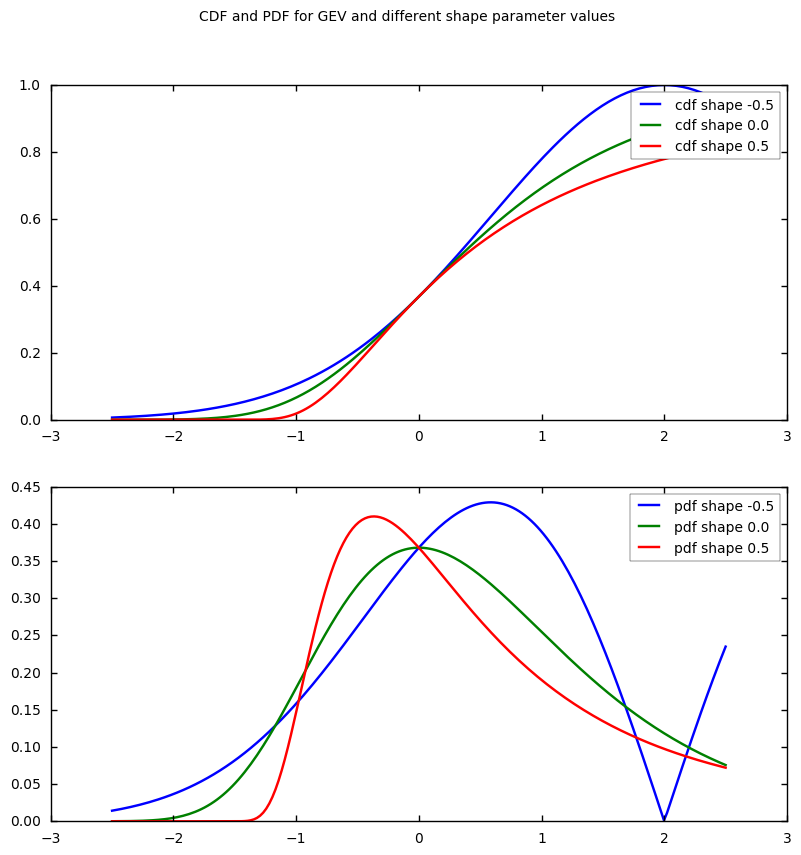

In [1]:
import numpy as np
from math import exp
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')

par={'mu':0.,'sigma':1.}
xi=[-0.5,0.,0.5]
rangeX=np.linspace(-2.5,2.5,num=200)
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(9.5, 9.5))
fig.suptitle('CDF and PDF for GEV and different shape parameter values')
#fig = plt.figure(figsize=(20, 20))
t0=lambda y: exp(-(y-par['mu'])/par['sigma'])
tx=lambda y,xi_i: (1.+xi_i*(y-par['mu'])/par['sigma'])**(-1./xi_i)

#fig.add_subplot(2,1,1)
for xi_i in xi:
    if xi_i > 0.0 or xi_i <0.0: #safer float comparison for xi_i==0
        H_cdf=lambda x: exp(-tx(x,xi_i))
        H_pdf=lambda x: ((1./par['sigma'])*(tx(x,xi_i))**(xi_i+1.))*exp(-tx(x,xi_i))
    else:
        H_cdf=lambda x: exp(-t0(x))
        H_pdf=lambda x: ((1./par['sigma'])*(t0(x))**(xi_i+1.))*exp(-t0(x))
    gev_cdf=np.array([H_cdf(x) for x in rangeX])
    gev_pdf=np.array([H_pdf(x) for x in rangeX])
    ax1.plot(rangeX, gev_cdf, '-', label='cdf shape {}'.format(xi_i))
    ax2.plot(rangeX, gev_pdf, '-', label='pdf shape {}'.format(xi_i))
ax1.legend()
plt.grid()
ax2.legend()
plt.grid()
plt.show()